## Ocean Sciences Meeting 2026

Figures for Tomy's presentation.  Explore ADCP, thermistor, and oxygen logger data around 26-28.11.2025 and 13.01.2026.

In [95]:
# imports
import ewgreaders as ewg
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Moorings

In [26]:
lake = 'Zugersee'
location = 'LZC'
year = '2026'
date = '20260114'

t_start = pd.to_datetime('2026-01-13') - pd.Timedelta(days=7)
t_end = pd.to_datetime('2026-01-14') + pd.Timedelta(hours=9)

In [27]:
mreader = ewg.mooring_reader.MooringReader(lake, location, year, date)
adcps = mreader.get_adcps()
thermistors = mreader.get_thermistors()
oxygen_loggers = mreader.get_oxygen_loggers()

#### ADCPs

In [28]:
adcps

[{'instrument': 'adcp', 'serial_id': '8315', 'mab': 123, 'comments': 'up'},
 {'instrument': 'adcp', 'serial_id': '672', 'mab': 98, 'comments': 'up'},
 {'instrument': 'adcp', 'serial_id': '1728', 'mab': 98, 'comments': 'down'},
 {'instrument': 'adcp', 'serial_id': '16549', 'mab': 41.4, 'comments': 'up'}]

In [32]:
all_adcp = []
for adcp in adcps:
    serial_id = adcp['serial_id']

    areader = ewg.adcp_reader.ADCPReader(serial_id, lake, location, year, date)
    fpath = areader.locate_data_file('L0')
    ds = areader.load_from_L0(fpath)
    ds = areader.range_to_depth(ds)
    ds = areader.run_qa(ds)
    print(areader.depth, ds.attrs['cell_size'])
    ds = ds.sel(time=slice(t_start, t_end))
    all_adcp.append(ds)


Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\12U8315.000 ...
43.408226013183594 1.0

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\3U672.000 ...
71.59141540527344 1.5

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\6D1728.000 ...
80.0 1.0

Reading file Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/2026/Mooring/20260114/LZC/L0\3U16549.000 ...
131.96441650390625 1.0


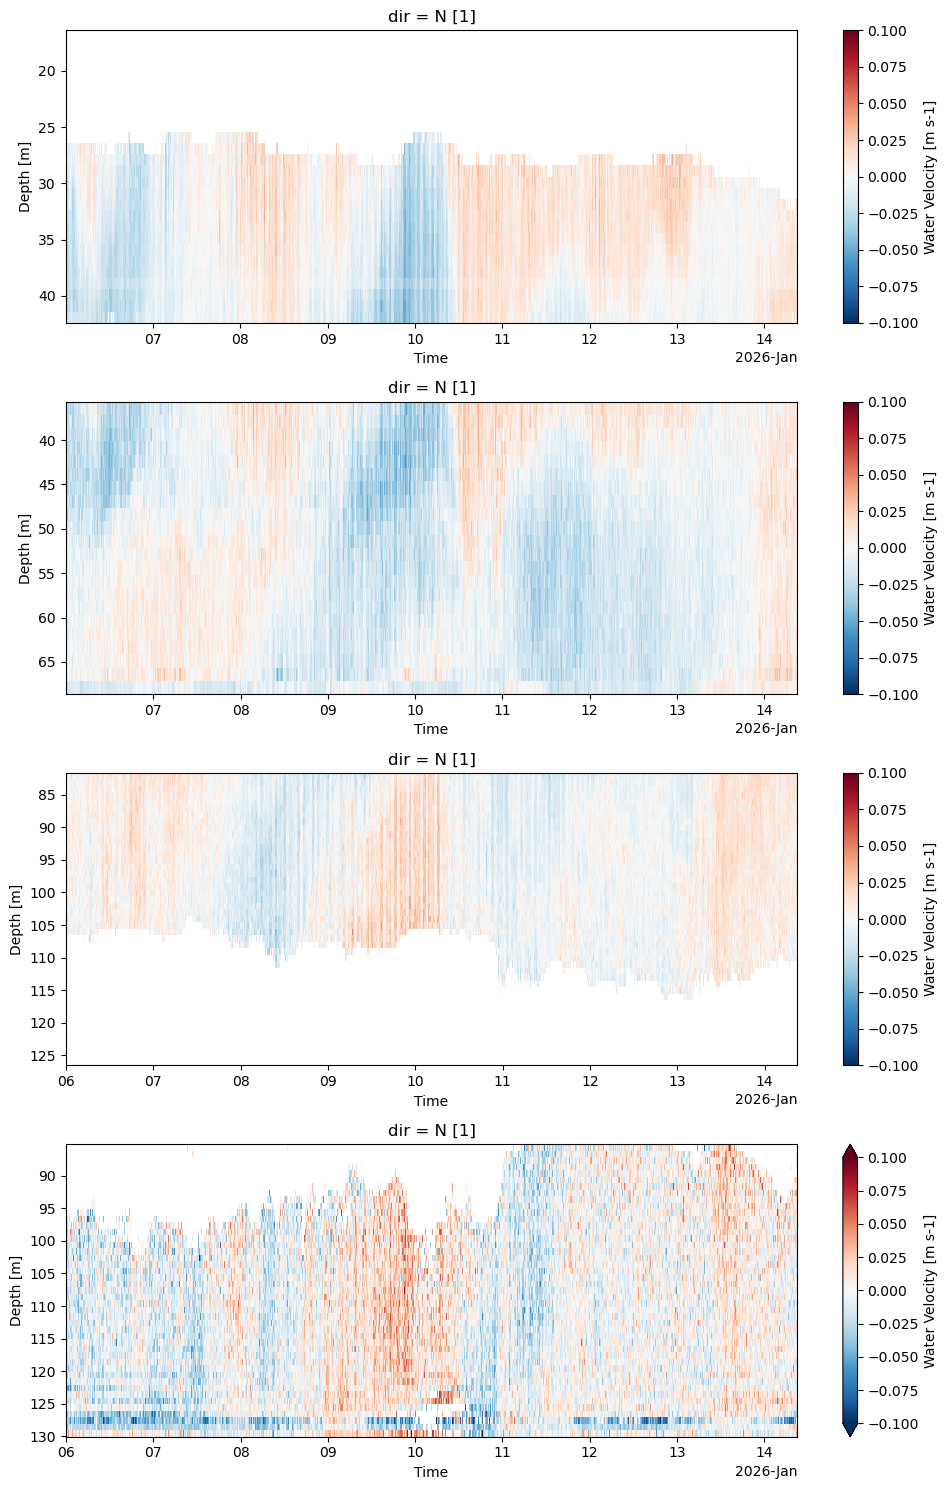

In [44]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))

for i, d in enumerate(all_adcp):
    #d = areader.qa_corr_stdev(d, stdev_thresh=0.025)
    d.vel.sel(dir='N').plot(cmap='RdBu_r', vmin=-0.1, vmax=0.1, ax=ax[i])

    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Depth [m]')

    ax[i].invert_yaxis()

plt.tight_layout()
plt.show()

#### Thermistors

In [45]:
thermistors

[{'instrument': 'rbr_temp', 'serial_id': '200570', 'mab': 120, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200569', 'mab': 115, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205523', 'mab': 110, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205517', 'mab': 105, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205518', 'mab': 100, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205535', 'mab': 95, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205527', 'mab': 90, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '209296', 'mab': 85, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205521', 'mab': 80, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200567', 'mab': 75, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '205536', 'mab': 70, 'comments': ''},
 {'instrument': 'rbr_temp', 'serial_id': '200575', 'mab': 65, 'comments': ''},
 {'instrument': 'rbr_temp',
  'serial_id': '209

In [46]:
ds_chain = []
for t in thermistors:
    serial_id = t['serial_id']

    treader = ewg.thermistor_reader.ThermistorReader(serial_id, lake, location, year, date)
    ds = treader.load_from_L0()
    ds = ds.sel(time=slice(t_start, t_end))
    ds_chain.append(ds)

ds_temp = mreader.create_instrument_chain(ds_chain)

C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_aligned, dim='depth')


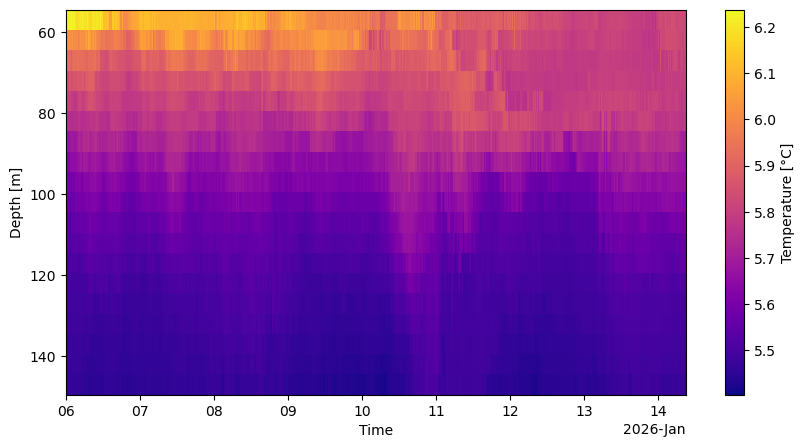

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_temp.temp.plot(cmap='plasma', ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Temperature [°C]")

ax.invert_yaxis()
plt.show()

#### Oxygen loggers

In [ ]:
oxygen_loggers

[{'instrument': 'minidot', 'serial_id': '007431', 'mab': 70, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '893460', 'mab': 65, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '969903', 'mab': 60, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '899457', 'mab': 55, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '990558', 'mab': 50, 'comments': ''},
 {'instrument': 'minidot', 'serial_id': '867666', 'mab': 45, 'comments': ''}]

In [48]:
ds_chain = []
for ol in oxygen_loggers:
    serial_id = ol['serial_id']

    oreader = ewg.o2_reader.O2Reader(serial_id, lake, location, year, date)
    fpath = os.path.join(mreader.dpath_L0, f'7450-{serial_id}/Cat.txt')
    oreader.fpath = fpath
    oreader.sensor = oreader.get_sensor_type()
    oreader.mab = oreader.get_mab()
    oreader.depth = oreader.set_depth()

    ds = oreader.load_from_L0()
    ds = ds.sel(time=slice(t_start, t_end))
    ds['d_oxygen_conc'] *= (1000/32)    # conver to umol/L
    ds_chain.append(ds)

ds_do = mreader.create_instrument_chain(ds_chain)

C:\Users\herremha\elcres\ewgreaders\ewgreaders\readers\mooring_reader.py:243: FutureWarning: In a future version of xarray the default value for coords will change from coords='different' to coords='minimal'. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set coords explicitly.
  return xr.concat(ds_aligned, dim='depth')


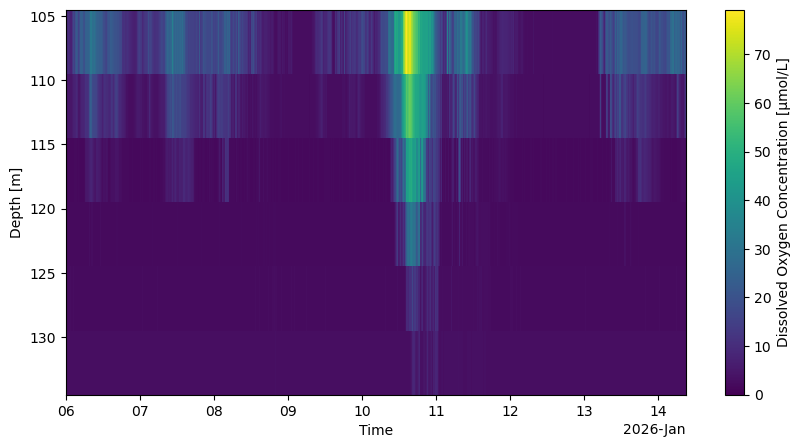

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ds_do.d_oxygen_conc.plot(cmap='viridis', vmin=0, ax=ax)

ax.set_xlabel("Time")
ax.set_ylabel('Depth [m]')
im.colorbar.set_label("Dissolved Oxygen Concentration [µmol/L]")

ax.invert_yaxis()
plt.show()

### CTD

Thorpe scale and oxygen displacement lengths.

In [51]:
serial_id = '1807'
lake = 'Zugersee'
year = '2026'
date = '20260113'

dpath_L1 = f'Q:/Messdaten/Aphys_Hypothesis_data/{lake}/{year}/CTD/{date}/L1'

In [ ]:
data = []
for p in os.listdir(dpath_L1):
    fpath = os.path.join(dpath_L1, p)
    
    ctdreader = ewg.ctd_reader.CTDReader(lake, year, date, fpath, serial_id)
    bathy = ctdreader.load_bathymetry()
    ds = ctdreader.load_from_L1()

        # metadata
    name = ds.attrs['Profile name']
    time = ds.attrs['Time of measurement (local)']
    xsc = int(ds.attrs['X Coordinate (CH1903)']) + int(2e6)
    ysc = int(ds.attrs['Y Coordinate (CH1903)']) + int(1e6)
    total_depth = bathy.sel(xsc=xsc, ysc=ysc).depth.item()

    # data quality
    mask = (ds['depth'].notnull()) & (ds['Temp_qual'] == 0) & (ds['DO_mg_qual'] == 0)
    depth = ds['depth'][mask]
    temp = ds['Temp'][mask]
    do = ds['DO_mg'][mask]

    temp_sorted, depth_sorted = ewg.signal.order_profile(temp, depth, True)
    thorpe_displacement = depth.values - depth_sorted.values

    do_sorted, depth_sorted = ewg.signal.order_profile(do, depth, True)
    do_displacement = depth.values - depth_sorted.values

    dat = pd.DataFrame({
        'depth': depth.values,
        'temp': temp.values,
        'do': do.values,
        'temp_sorted': temp_sorted.values,
        'do_sorted': do_sorted.values,
        'thorpe_displacement': thorpe_displacement,
        'do_displacement': do_displacement
    })
    dat[['name', 'time', 'xsc', 'ysc', 'total_depth']] = name, time, xsc, ysc, total_depth
    data.append(dat)

data = pd.concat(data, ignore_index=True)

In [151]:
data = data.query("depth > 1")

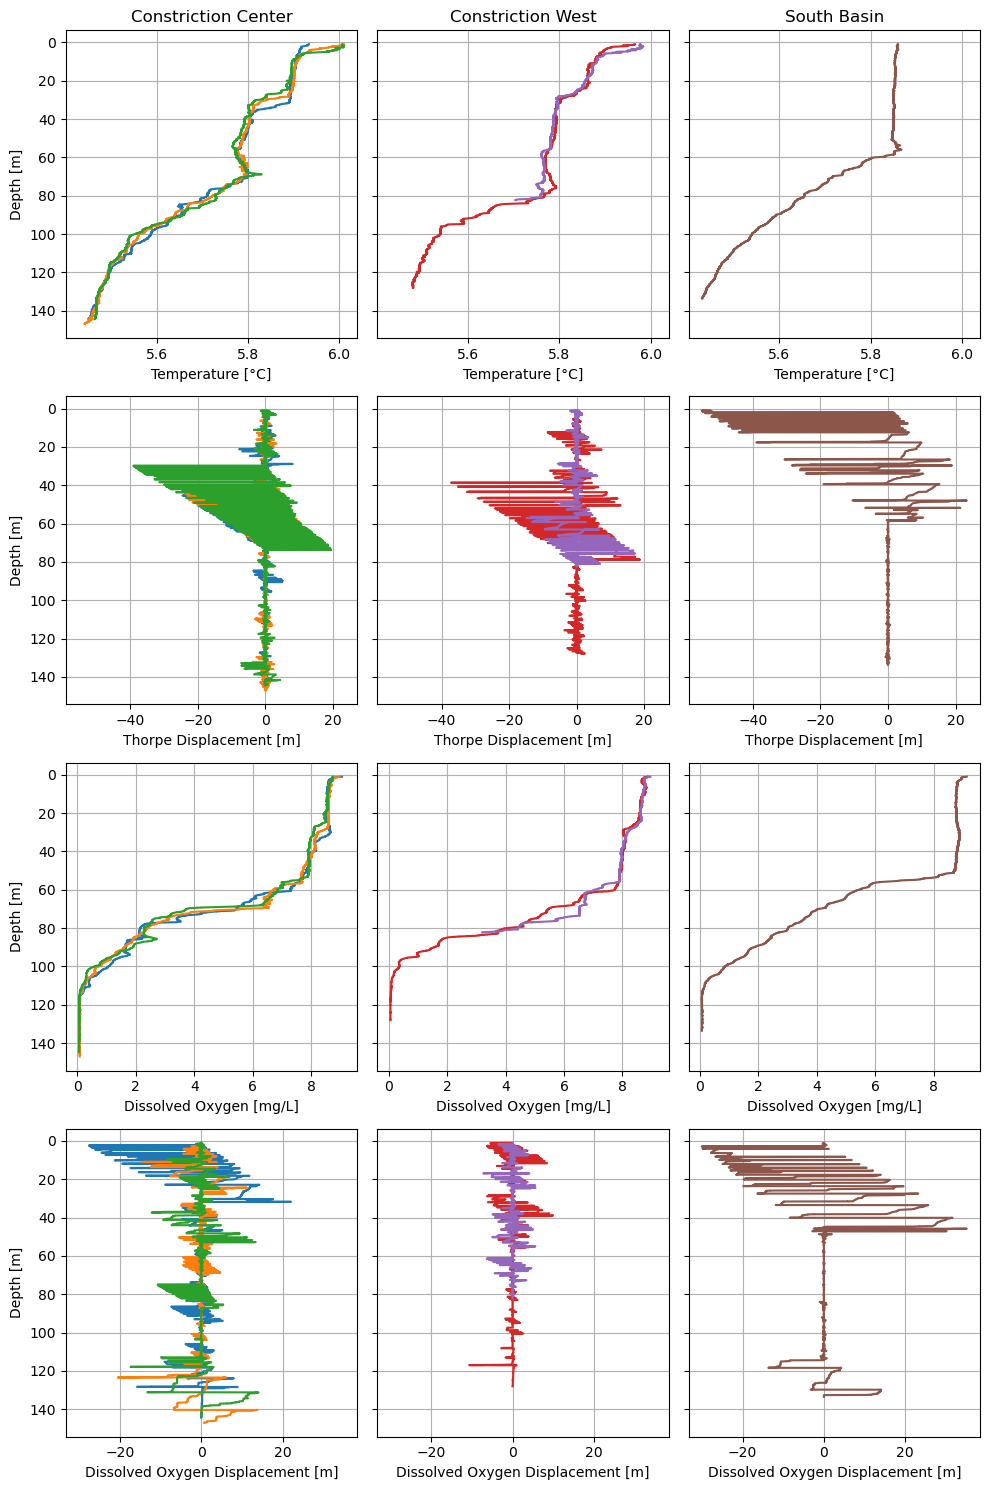

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(10, 15), sharey=True, sharex='row')
palette = sns.color_palette('tab10', n_colors=6)

# VMPC
sns.lineplot(data.query("name == 'VMPC'"), x='temp', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[0, 0], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='thorpe_displacement', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[1, 0], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='do', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[2, 0], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='do_displacement', y='depth', orient='y', palette=palette[:3], hue='time', ax=ax[3, 0], legend=False)

# VMPW
sns.lineplot(data.query("name == 'VMPW'"), x='temp', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[0, 1], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='thorpe_displacement', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[1, 1], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='do', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[2, 1], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='do_displacement', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[3, 1], legend=False)

# VMPS
sns.lineplot(data.query("name == 'VMPS'"), x='temp', y='depth', orient='y', color=palette[-1], ax=ax[0, 2])
sns.lineplot(data.query("name == 'VMPS'"), x='thorpe_displacement', y='depth', orient='y', color=palette[-1], ax=ax[1, 2])
sns.lineplot(data.query("name == 'VMPS'"), x='do', y='depth', orient='y', color=palette[-1], ax=ax[2, 2])
sns.lineplot(data.query("name == 'VMPS'"), x='do_displacement', y='depth', orient='y', color=palette[-1], ax=ax[3, 2])

for i in range(ax.shape[0]):
    ax[i, 0].set_ylabel('Depth [m]')
    for j in range(ax.shape[1]):
        ax[0, j].set_xlabel('Temperature [°C]')
        ax[1, j].set_xlabel('Thorpe Displacement [m]')
        ax[2, j].set_xlabel('Dissolved Oxygen [mg/L]')
        ax[3, j].set_xlabel('Dissolved Oxygen Displacement [m]')
        ax[i, j].grid(True)

ax[0, 0].set_title('Constriction Center')
ax[0, 1].set_title('Constriction West')
ax[0, 2].set_title('South Basin')

ax[0,0].invert_yaxis()

plt.tight_layout()
plt.show()

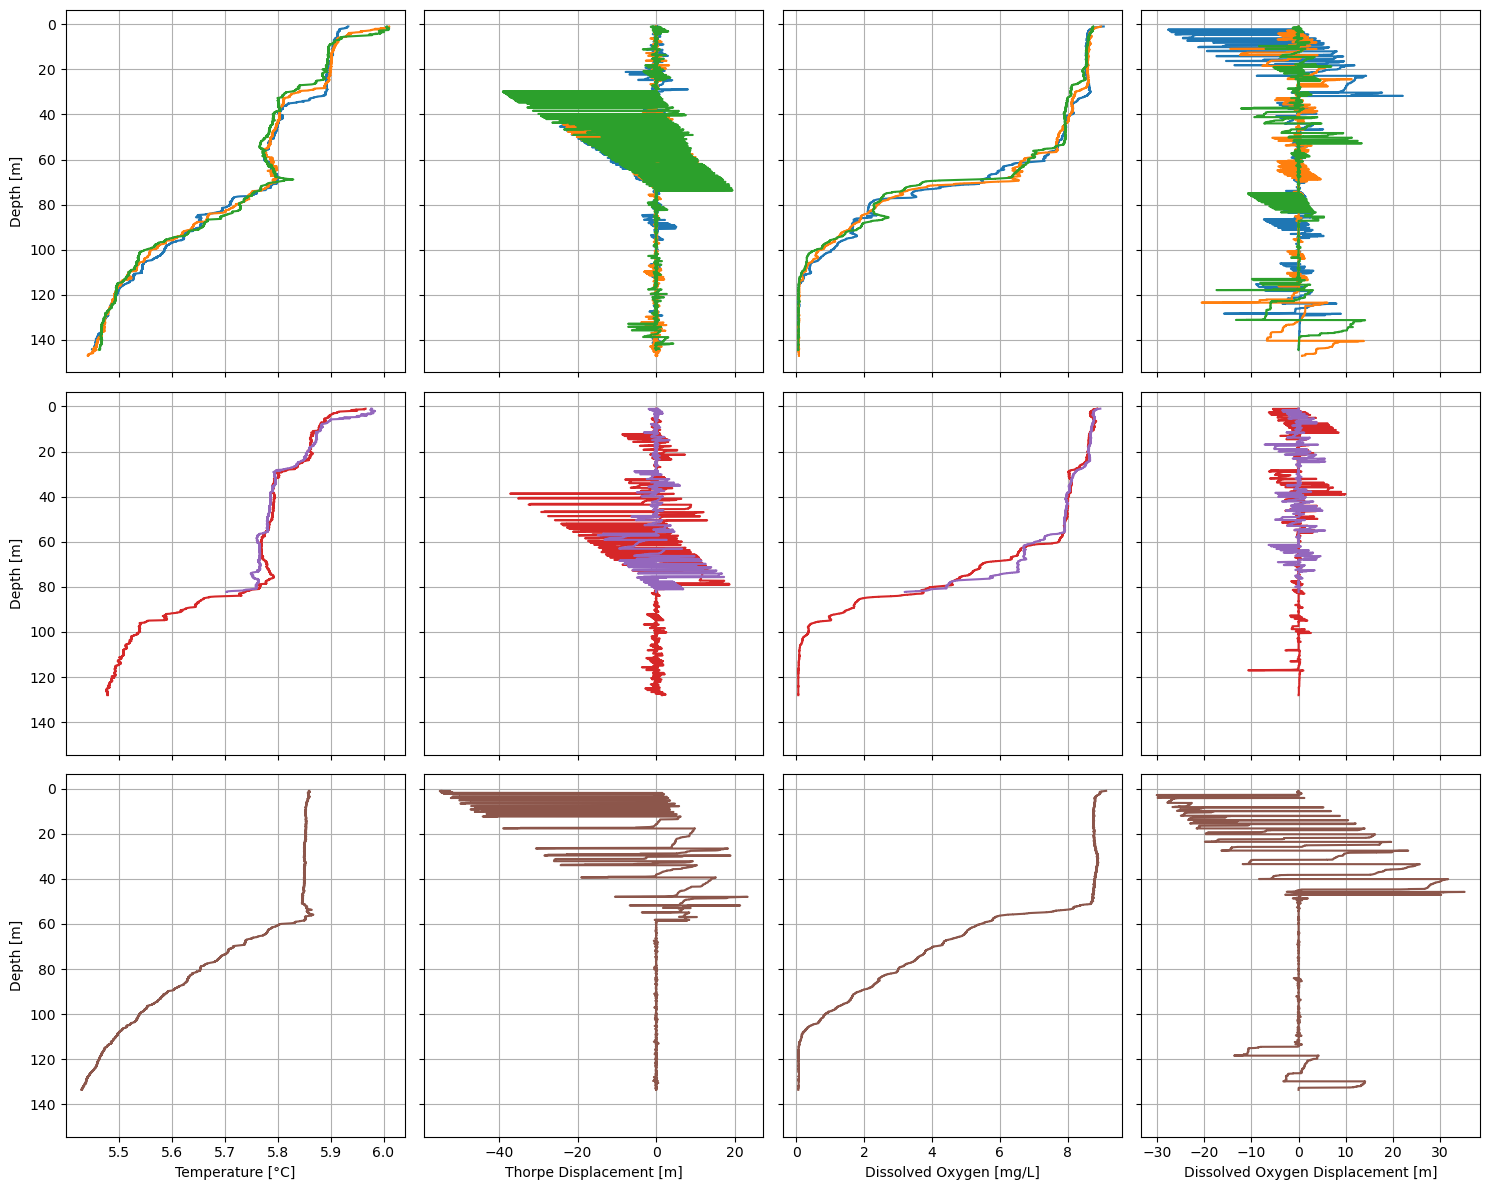

In [172]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12), sharey=True, sharex='col')
palette = sns.color_palette('tab10', n_colors=6)

# VMPC
sns.lineplot(data.query("name == 'VMPC'"), x='temp', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[0, 0], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='thorpe_displacement', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[0, 1], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='do', y='depth', orient='y', hue='time', palette=palette[:3], ax=ax[0, 2], legend=False)
sns.lineplot(data.query("name == 'VMPC'"), x='do_displacement', y='depth', orient='y', palette=palette[:3], hue='time', ax=ax[0, 3], legend=False)

# VMPW
sns.lineplot(data.query("name == 'VMPW'"), x='temp', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[1, 0], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='thorpe_displacement', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[1, 1], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='do', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[1, 2], legend=False)
sns.lineplot(data.query("name == 'VMPW'"), x='do_displacement', y='depth', orient='y', hue='time', palette=palette[3:5], ax=ax[1, 3], legend=False)

# VMPS
sns.lineplot(data.query("name == 'VMPS'"), x='temp', y='depth', orient='y', color=palette[-1], ax=ax[2, 0])
sns.lineplot(data.query("name == 'VMPS'"), x='thorpe_displacement', y='depth', orient='y', color=palette[-1], ax=ax[2, 1])
sns.lineplot(data.query("name == 'VMPS'"), x='do', y='depth', orient='y', color=palette[-1], ax=ax[2, 2])
sns.lineplot(data.query("name == 'VMPS'"), x='do_displacement', y='depth', orient='y', color=palette[-1], ax=ax[2, 3])

for i in range(ax.shape[0]):
    ax[i, 0].set_ylabel('Depth [m]')
    for j in range(ax.shape[1]):
        ax[i, j].grid(True)

ax[2, 0].set_xlabel('Temperature [°C]')
ax[2, 1].set_xlabel('Thorpe Displacement [m]')
ax[2, 2].set_xlabel('Dissolved Oxygen [mg/L]')
ax[2, 3].set_xlabel('Dissolved Oxygen Displacement [m]')

ax[0,0].invert_yaxis()

plt.tight_layout()
plt.show()

#### RMS Displacement

For temperature, only consider region below thermocline.  For oxygen, only include hypolimnion to anoxic region.  Or just 85-105 meters.

In [176]:
rms_fxn = lambda x: np.sqrt((x**2).mean())
rms = data[data['depth'].between(85, 105)].groupby(['name', 'time']).agg({'thorpe_displacement': rms_fxn, 'do_displacement': rms_fxn}).reset_index()
rms

,name,time,thorpe_displacement,do_displacement
0,VMPC,12:15,1.387831,2.212028
1,VMPC,13:37,0.130859,0.513698
2,VMPC,16:23,0.313256,1.321642
3,VMPS,10:48,0.074484,0.111497
4,VMPW,14:20,0.679928,0.662550


In [180]:
dfm = pd.melt(rms, id_vars=['name', 'time'], value_vars=['thorpe_displacement', 'do_displacement'], var_name='label', value_name='displacement')

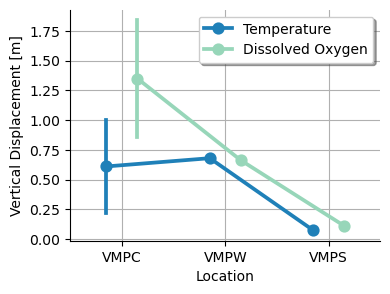

In [193]:
fig, ax = plt.subplots(figsize=(4, 3))

sns.pointplot(dfm, x='name', y='displacement', order=['VMPC', 'VMPW', 'VMPS'], hue='label', hue_order=['thorpe_displacement', 'do_displacement'],
               palette='YlGnBu_r', dodge=0.3, errorbar=('se', 1), ax=ax)

ax.set_xlabel('Location')
ax.set_ylabel('Vertical Displacement [m]')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(True)
labels = ['Temperature', 'Dissolved Oxygen']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, shadow=True, fancybox=True)
plt.show()

In [194]:
serial_id = '1807'
lake = 'Zugersee'
year = '2026'
date = '20260107'

dpath_L1 = f'Q:/Messdaten/Aphys_Hypothesis_data/{lake}/{year}/CTD/{date}/L1'

In [195]:
data = []
for p in os.listdir(dpath_L1):
    fpath = os.path.join(dpath_L1, p)
    
    ctdreader = ewg.ctd_reader.CTDReader(lake, year, date, fpath, serial_id)
    bathy = ctdreader.load_bathymetry()
    ds = ctdreader.load_from_L1()

        # metadata
    name = ds.attrs['Profile name']
    time = ds.attrs['Time of measurement (local)']
    xsc = int(ds.attrs['X Coordinate (CH1903)']) + int(2e6)
    ysc = int(ds.attrs['Y Coordinate (CH1903)']) + int(1e6)
    total_depth = bathy.sel(xsc=xsc, ysc=ysc).depth.item()

    # data quality
    mask = (ds['depth'].notnull()) & (ds['Temp_qual'] == 0) & (ds['DO_mg_qual'] == 0)
    depth = ds['depth'][mask]
    temp = ds['Temp'][mask]
    do = ds['DO_mg'][mask]

    temp_sorted, depth_sorted = ewg.signal.order_profile(temp, depth, True)
    thorpe_displacement = depth.values - depth_sorted.values

    do_sorted, depth_sorted = ewg.signal.order_profile(do, depth, True)
    do_displacement = depth.values - depth_sorted.values

    dat = pd.DataFrame({
        'depth': depth.values,
        'temp': temp.values,
        'do': do.values,
        'temp_sorted': temp_sorted.values,
        'do_sorted': do_sorted.values,
        'thorpe_displacement': thorpe_displacement,
        'do_displacement': do_displacement
    })
    dat[['name', 'time', 'xsc', 'ysc', 'total_depth']] = name, time, xsc, ysc, total_depth
    data.append(dat)

data = pd.concat(data, ignore_index=True)

In [196]:
data = data.query("depth > 1")

In [198]:
rms_fxn = lambda x: np.sqrt((x**2).mean())
rms = data[data['depth'].between(85, 105)].groupby(['name', 'time']).agg({'thorpe_displacement': rms_fxn, 'do_displacement': rms_fxn}).reset_index()

dfm = pd.melt(rms, id_vars=['name', 'time'], value_vars=['thorpe_displacement', 'do_displacement'], var_name='label', value_name='displacement')

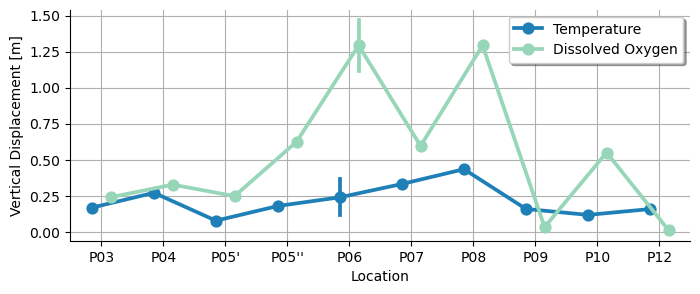

In [204]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.pointplot(dfm, x='name', y='displacement', hue='label', hue_order=['thorpe_displacement', 'do_displacement'],
               palette='YlGnBu_r', dodge=0.3, errorbar=('se', 1), ax=ax)

ax.set_xlabel('Location')
ax.set_ylabel('Vertical Displacement [m]')

ax.spines[['right', 'top']].set_visible(False)
ax.grid(True)
labels = ['Temperature', 'Dissolved Oxygen']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, labels, shadow=True, fancybox=True)
plt.show()